Team Members: Yanzhen Chen, Siyuan Chen, Guo Tang, Yifan Wang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA


# **Question 1 — The DS Problem**


Clearly define the Data Science problem. Articulate the goal of analyzing BMI trends (normal weight, overweight, and obesity) and explain the potential impact of the analysis on public health decision-making.

# **Question 2 — Prepare the Data**

1. Load the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Normal_weight__overweight__and_obesity_among_adults_aged_20_and_over__by_selected_characteristics__United_States.csv')

data.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1988-1994,1,20 years and over,1.0,41.6,0.8,NaN
1,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1999-2002,2,20 years and over,1.0,33.0,0.8,NaN
2,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2001-2004,3,20 years and over,1.0,32.3,0.7,NaN
3,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2003-2006,4,20 years and over,1.0,31.6,0.8,NaN
4,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2005-2008,5,20 years and over,1.0,30.8,0.7,NaN


2. Ensure all variables have correct data types and convert them to appropriate types if needed (e.g., convert year ranges to numerical data).

In [4]:
# Check the original data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       3360 non-null   object 
 1   PANEL           3360 non-null   object 
 2   PANEL_NUM       3360 non-null   int64  
 3   UNIT            3360 non-null   object 
 4   UNIT_NUM        3360 non-null   int64  
 5   STUB_NAME       3360 non-null   object 
 6   STUB_NAME_NUM   3360 non-null   int64  
 7   STUB_LABEL      3360 non-null   object 
 8   STUB_LABEL_NUM  3360 non-null   float64
 9   YEAR            3360 non-null   object 
 10  YEAR_NUM        3360 non-null   int64  
 11  AGE             3360 non-null   object 
 12  AGE_NUM         3360 non-null   float64
 13  ESTIMATE        2899 non-null   float64
 14  SE              2899 non-null   float64
 15  FLAG            844 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 420.1+ KB
None


In [5]:
# Convert the numeric columns as float type
num_cols = ['STUB_LABEL_NUM', 'AGE_NUM', 'ESTIMATE', 'SE']
for col in num_cols:
    data[col] = data[col].astype(float)

# Convert category columns as categoty type
category_cols = ['INDICATOR', 'PANEL', 'UNIT', 'STUB_NAME', 'STUB_LABEL']
for col in category_cols:
    data[col] = data[col].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   INDICATOR       3360 non-null   category
 1   PANEL           3360 non-null   category
 2   PANEL_NUM       3360 non-null   int64   
 3   UNIT            3360 non-null   category
 4   UNIT_NUM        3360 non-null   int64   
 5   STUB_NAME       3360 non-null   category
 6   STUB_NAME_NUM   3360 non-null   int64   
 7   STUB_LABEL      3360 non-null   category
 8   STUB_LABEL_NUM  3360 non-null   float64 
 9   YEAR            3360 non-null   object  
 10  YEAR_NUM        3360 non-null   int64   
 11  AGE             3360 non-null   object  
 12  AGE_NUM         3360 non-null   float64 
 13  ESTIMATE        2899 non-null   float64 
 14  SE              2899 non-null   float64 
 15  FLAG            844 non-null    object  
dtypes: category(5), float64(4), int64(4), object(3)
memory usage

3. Handle missing and invalid values by removing, imputing, or flagging them to ensure data integrity.

In [6]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           461
SE                 461
FLAG              2516
dtype: int64


In [7]:
data_cleaned = data.dropna(subset=['ESTIMATE'])
data_cleaned = data_cleaned.drop(columns=['FLAG'])
missing_values = data_cleaned.isnull().sum()
print(missing_values)

INDICATOR         0
PANEL             0
PANEL_NUM         0
UNIT              0
UNIT_NUM          0
STUB_NAME         0
STUB_NAME_NUM     0
STUB_LABEL        0
STUB_LABEL_NUM    0
YEAR              0
YEAR_NUM          0
AGE               0
AGE_NUM           0
ESTIMATE          0
SE                0
dtype: int64


In [8]:
# Create the YEAR and YEAR_NUM tables
year_table = data_cleaned[['YEAR', 'YEAR_NUM']].drop_duplicates().sort_values(by='YEAR_NUM')

# Create the AGE and AGE_NUM tables
age_table = data_cleaned[['AGE', 'AGE_NUM']].drop_duplicates().sort_values(by='AGE_NUM')

# Print tables
print("Year and Year_Num Table:")
print(year_table.to_string(index=False))

print("\nAge and Age_Num Table:")
print(age_table.to_string(index=False))


Year and Year_Num Table:
     YEAR  YEAR_NUM
1988-1994         1
1999-2002         2
2001-2004         3
2003-2006         4
2005-2008         5
2007-2010         6
2009-2012         7
2011-2014         8
2013-2016         9
2015-2018        10

Age and Age_Num Table:
              AGE  AGE_NUM
20 years and over      1.0
      20-34 years      1.1
      35-44 years      1.2
      45-54 years      1.3
      55-64 years      1.4
      65-74 years      1.5
75 years and over      1.6


1. Output the labels with their corresponding numbers for better analysis of the data.

In [9]:
# Define the columns to be processed
columns_with_num = {
    'PANEL': 'PANEL_NUM',
    'UNIT': 'UNIT_NUM',
    'STUB_NAME': 'STUB_NAME_NUM',
    'STUB_LABEL': 'STUB_LABEL_NUM',
    'YEAR': 'YEAR_NUM',
    'AGE': 'AGE_NUM'
}

# Iterate over these columns, generating a table for each pair of columns
tables = {}
for col, num_col in columns_with_num.items():
    if col in data_cleaned.columns and num_col in data_cleaned.columns:
        tables[col] = data_cleaned[[num_col, col]].drop_duplicates().sort_values(by=num_col)

# Output each pair of tables
for col, table in tables.items():
    print(f"{columns_with_num[col]} and {col} Table:")
    print("-" * 50)
    for idx in range(len(table)):
        print(f"{table.iloc[idx, 0]:<5} {table.iloc[idx, 1]:<50}")
    print("-" * 50)
    print("\n")

PANEL_NUM and PANEL Table:
--------------------------------------------------
1     Normal weight (BMI from 18.5 to 24.9)             
2     Overweight or obese (BMI greater than or equal to 25.0)
3     Obesity (BMI greater than or equal to 30.0)       
4     Grade 1 obesity (BMI from 30.0 to 34.9)           
5     Grade 2 obesity (BMI from 35.0 to 39.9)           
6     Grade 3 obesity (BMI greater than or equal to 40.0)
--------------------------------------------------


UNIT_NUM and UNIT Table:
--------------------------------------------------
1     Percent of population, age-adjusted               
2     Percent of population, crude                      
--------------------------------------------------


STUB_NAME_NUM and STUB_NAME Table:
--------------------------------------------------
1     Total                                             
2     Sex                                               
3     Race and Hispanic origin                          
4     Sex and race an

2. Count the number of records for each PANEL and PANEL_NUM to analyze the distribution of weight categories and visualize the results.

In [10]:
# Count the number of records for each PANEL_NUM
panel_distribution = data_cleaned['PANEL_NUM'].value_counts().sort_index()

# Convert PANEL_NUM counts to a DataFrame
panel_distribution_df = panel_distribution.reset_index()
panel_distribution_df.columns = ['PANEL_NUM', 'Record_Count']

# Merge the counts with PANEL descriptions
panel_distribution_df = panel_distribution_df.merge(
    data[['PANEL_NUM', 'PANEL']].drop_duplicates(),
    on='PANEL_NUM',
    how='left'
)

# Reorder columns for better readability
panel_distribution_df = panel_distribution_df[['PANEL_NUM', 'PANEL', 'Record_Count']]

# Display the result
print(panel_distribution_df)



   PANEL_NUM                                              PANEL  Record_Count
0          1              Normal weight (BMI from 18.5 to 24.9)           488
1          2  Overweight or obese (BMI greater than or equal...           488
2          3        Obesity (BMI greater than or equal to 30.0)           488
3          4            Grade 1 obesity (BMI from 30.0 to 34.9)           488
4          5            Grade 2 obesity (BMI from 35.0 to 39.9)           483
5          6  Grade 3 obesity (BMI greater than or equal to ...           464


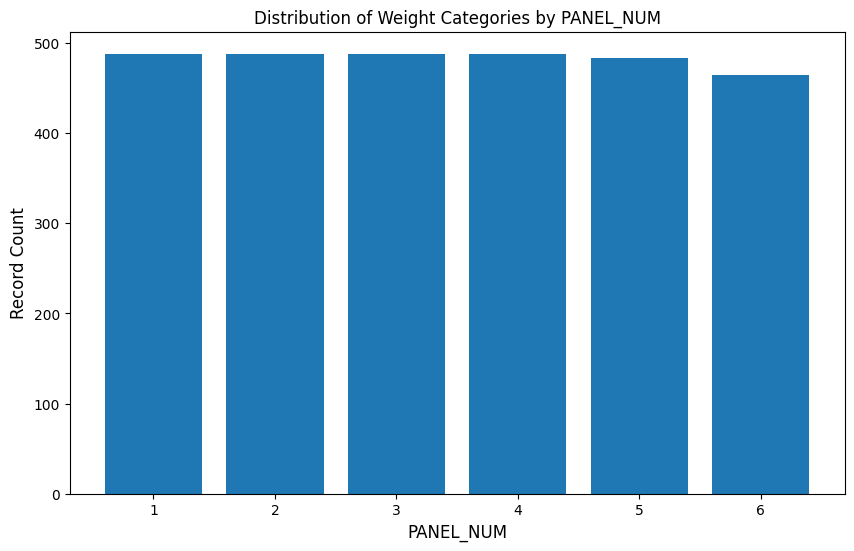

In [11]:
# Count the number of records for each PANEL_NUM
panel_distribution = data_cleaned['PANEL_NUM'].value_counts().sort_index()

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
plt.bar(panel_distribution.index, panel_distribution.values, tick_label=panel_distribution.index)
plt.xlabel('PANEL_NUM', fontsize=12)
plt.ylabel('Record Count', fontsize=12)
plt.title('Distribution of Weight Categories by PANEL_NUM')
plt.show()


3. Group the data by UNIT and count the records to determine the distribution of the two types of population units and visualize the results.

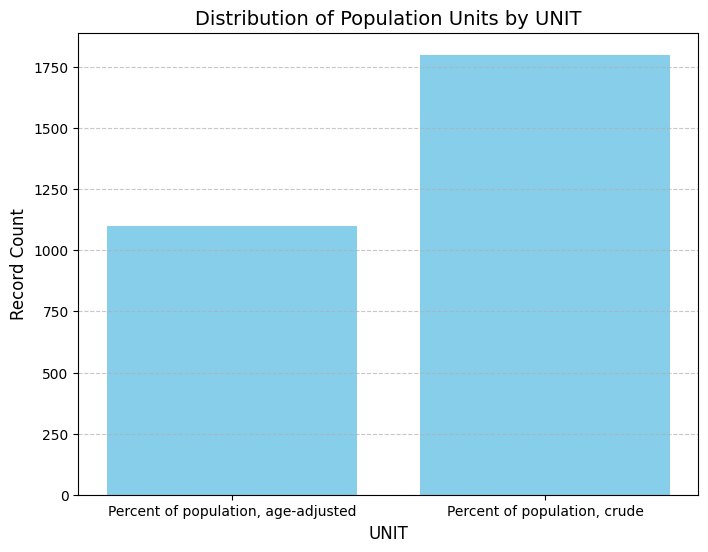

                                  UNIT  Record_Count
0  Percent of population, age-adjusted          1099
1         Percent of population, crude          1800


In [12]:
# Group the data by UNIT and count the records
unit_distribution = data_cleaned['UNIT'].value_counts().sort_index()

# Create a DataFrame for clarity
unit_distribution_df = unit_distribution.reset_index()
unit_distribution_df.columns = ['UNIT', 'Record_Count']

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(unit_distribution.index, unit_distribution.values, tick_label=unit_distribution.index, color='skyblue')
plt.xlabel('UNIT', fontsize=12)
plt.ylabel('Record Count', fontsize=12)
plt.title('Distribution of Population Units by UNIT', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the distribution
print(unit_distribution_df)


4. Count the number of records for each STUB_NAME to analyze the coverage of different characteristics and visualize the results.

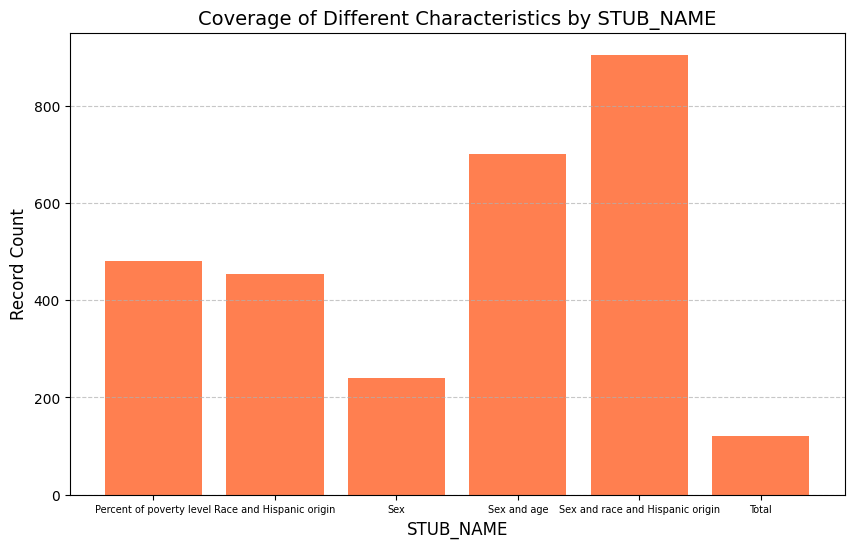

                          STUB_NAME  Record_Count
0          Percent of poverty level           480
1          Race and Hispanic origin           454
2                               Sex           240
3                       Sex and age           700
4  Sex and race and Hispanic origin           905
5                             Total           120


In [13]:
# Group the data by STUB_NAME and count the records
stub_name_distribution = data_cleaned['STUB_NAME'].value_counts().sort_index()

# Create a DataFrame to present the counts
stub_name_distribution_df = stub_name_distribution.reset_index()
stub_name_distribution_df.columns = ['STUB_NAME', 'Record_Count']

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(stub_name_distribution.index, stub_name_distribution.values, tick_label=stub_name_distribution.index, color='coral')
plt.xlabel('STUB_NAME', fontsize=12)
plt.ylabel('Record Count', fontsize=12)
plt.title('Coverage of Different Characteristics by STUB_NAME', fontsize=14)
plt.xticks(fontsize=7)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the distribution table
print(stub_name_distribution_df)


5. Analyze the distribution of STUB_LABEL to observe the coverage of different gender and demographic groups, and visualize the results.

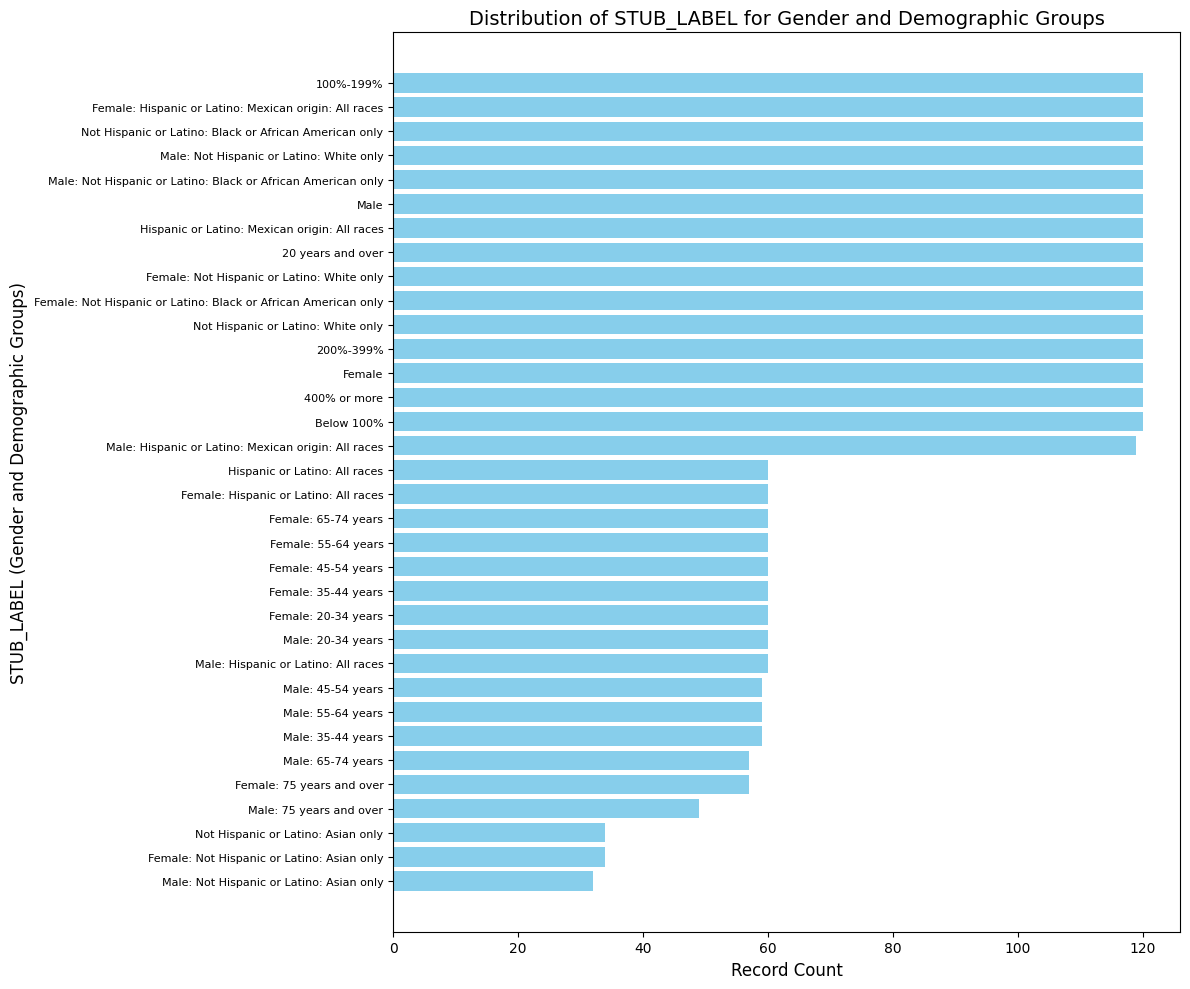

                                           STUB_LABEL  Record_Count
0            Male: Not Hispanic or Latino: Asian only            32
1          Female: Not Hispanic or Latino: Asian only            34
2                  Not Hispanic or Latino: Asian only            34
3                             Male: 75 years and over            49
4                           Female: 75 years and over            57
5                                   Male: 65-74 years            57
6                                   Male: 35-44 years            59
7                                   Male: 55-64 years            59
8                                   Male: 45-54 years            59
9                 Male: Hispanic or Latino: All races            60
10                                  Male: 20-34 years            60
11                                Female: 20-34 years            60
12                                Female: 35-44 years            60
13                                Female: 45-54 

In [14]:
# Count the number of records for each STUB_LABEL
stub_label_distribution = data_cleaned['STUB_LABEL'].value_counts().sort_values(ascending=True)

# Create a DataFrame for visualization
stub_label_distribution_df = stub_label_distribution.reset_index()
stub_label_distribution_df.columns = ['STUB_LABEL', 'Record_Count']

# Plot a horizontal bar chart
plt.figure(figsize=(12, 10))
plt.barh(stub_label_distribution_df['STUB_LABEL'], stub_label_distribution_df['Record_Count'], color='skyblue')
plt.xlabel('Record Count', fontsize=12)
plt.ylabel('STUB_LABEL (Gender and Demographic Groups)', fontsize=12)
plt.title('Distribution of STUB_LABEL for Gender and Demographic Groups', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Display the DataFrame
print(stub_label_distribution_df)


6. Count the number of records for each YEAR_NUM to observe the balance in time coverage.

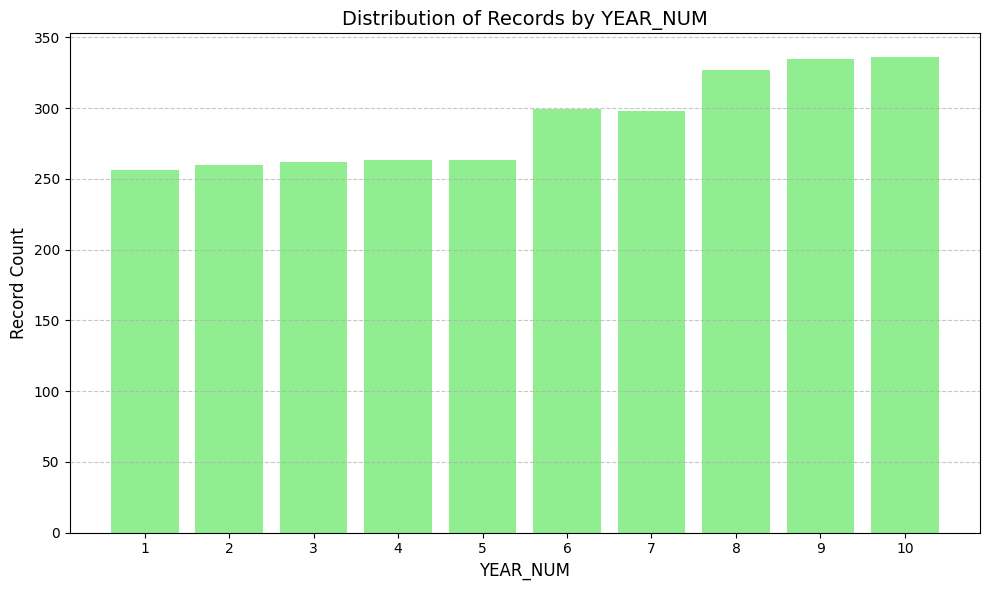

Distribution of Records by YEAR_NUM
   YEAR_NUM  Record_Count
0         1           256
1         2           260
2         3           262
3         4           263
4         5           263
5         6           299
6         7           298
7         8           327
8         9           335
9        10           336


In [15]:
# Count the number of records for each YEAR_NUM
year_num_distribution = data_cleaned['YEAR_NUM'].value_counts().sort_index()

# Create a DataFrame to display YEAR_NUM and the corresponding counts
year_num_distribution_df = year_num_distribution.reset_index()
year_num_distribution_df.columns = ['YEAR_NUM', 'Record_Count']

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(year_num_distribution_df['YEAR_NUM'], year_num_distribution_df['Record_Count'], color='lightgreen')
plt.xlabel('YEAR_NUM', fontsize=12)
plt.ylabel('Record Count', fontsize=12)
plt.title('Distribution of Records by YEAR_NUM', fontsize=14)
plt.xticks(year_num_distribution_df['YEAR_NUM'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the table
print("Distribution of Records by YEAR_NUM")
print(year_num_distribution_df)


7. Count the number of records for each AGE_NUM to observe the coverage of different age groups.

In [16]:

# Count the number of records for each AGE_NUM
age_num_distribution = data_cleaned['AGE_NUM'].value_counts().sort_index()

# Create a DataFrame to display AGE_NUM and the corresponding counts
age_num_distribution_df = age_num_distribution.reset_index()

# Print the distribution table
print("Distribution of Records by AGE_NUM")
print(age_num_distribution_df)



Distribution of Records by AGE_NUM
   AGE_NUM  count
0      1.0   2199
1      1.1    120
2      1.2    119
3      1.3    119
4      1.4    119
5      1.5    117
6      1.6    106


8. Analyze the distribution of weight categories across age groups by combining PANEL_NUM.

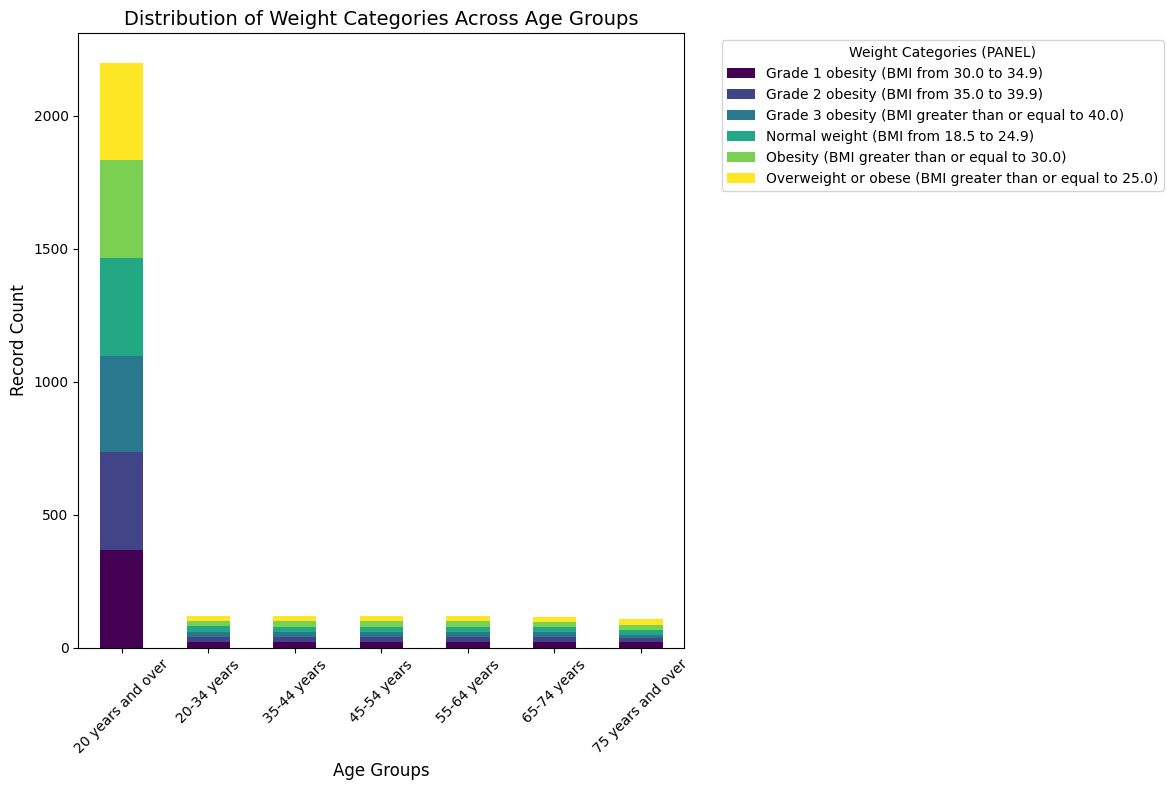

In [17]:
# Group the data by AGE_NUM and PANEL_NUM, then count the records
weight_age_distribution = data_cleaned.groupby(['AGE_NUM', 'PANEL_NUM']).size().reset_index(name='Record_Count')

# Merge with descriptive labels for AGE and PANEL
weight_age_distribution = weight_age_distribution.merge(
    data[['AGE_NUM', 'AGE']].drop_duplicates(),
    on='AGE_NUM',
    how='left'
).merge(
    data[['PANEL_NUM', 'PANEL']].drop_duplicates(),
    on='PANEL_NUM',
    how='left'
)

# Reorder the columns for better readability
weight_age_distribution = weight_age_distribution[['AGE_NUM', 'AGE', 'PANEL_NUM', 'PANEL', 'Record_Count']]

# Create a pivot table for visualization
pivot_table = weight_age_distribution.pivot(index='AGE', columns='PANEL', values='Record_Count').fillna(0)

# Visualization: Stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Record Count', fontsize=12)
plt.title('Distribution of Weight Categories Across Age Groups', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Weight Categories (PANEL)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Question 3 — Explore Demographic Patterns**

1. Analyze BMI trends across different age groups. Calculate the mean BMI estimates and identify groups with the most significant increase or decrease over time.

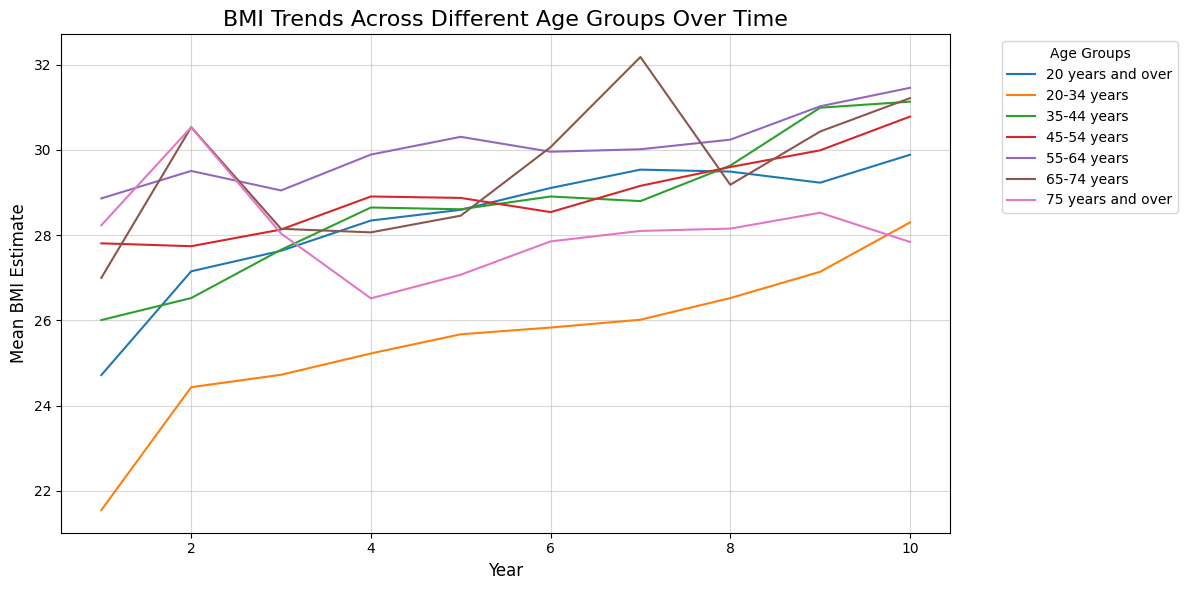

In [18]:
# Group the data by AGE and YEAR_NUM, calculate the mean BMI estimates
age_group_trends = data_cleaned.groupby(['AGE', 'YEAR_NUM'])['ESTIMATE'].mean().reset_index()

# Pivot the table for better visualization
age_group_pivot = age_group_trends.pivot(index='YEAR_NUM', columns='AGE', values='ESTIMATE')

# Plot the trends for each age group
plt.figure(figsize=(12, 6))
for age_group in age_group_pivot.columns:
    plt.plot(age_group_pivot.index, age_group_pivot[age_group], label=age_group)

plt.title('BMI Trends Across Different Age Groups Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean BMI Estimate', fontsize=12)
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


2. Compare the trends of normal weight, overweight, and obesity categories (PANEL) over time. Plot time-series visualizations to illustrate changes.

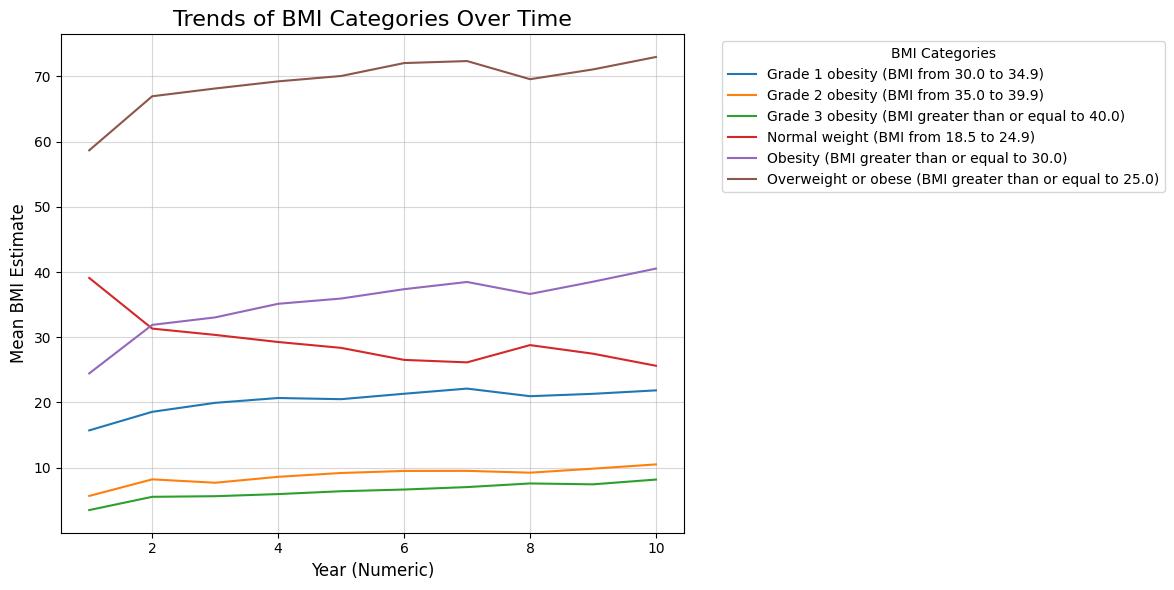

In [19]:
panel_trends = data_cleaned.groupby(['YEAR_NUM', 'PANEL'], observed=False).agg({'ESTIMATE': 'mean'}).reset_index()
panel_pivot = panel_trends.pivot(index='YEAR_NUM', columns='PANEL', values='ESTIMATE')

plt.figure(figsize=(12, 6))
for category in panel_pivot.columns:
    plt.plot(panel_pivot.index, panel_pivot[category], label=category)

plt.title('Trends of BMI Categories Over Time', fontsize=16)
plt.xlabel('Year (Numeric)', fontsize=12)
plt.ylabel('Mean BMI Estimate', fontsize=12)
plt.legend(title='BMI Categories', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

3. Conduct exploratory data analysis and provide at least three visualizations (e.g., time trends, BMI category distribution, demographic breakdowns) to support the context of the Data Science problem.

- time trends

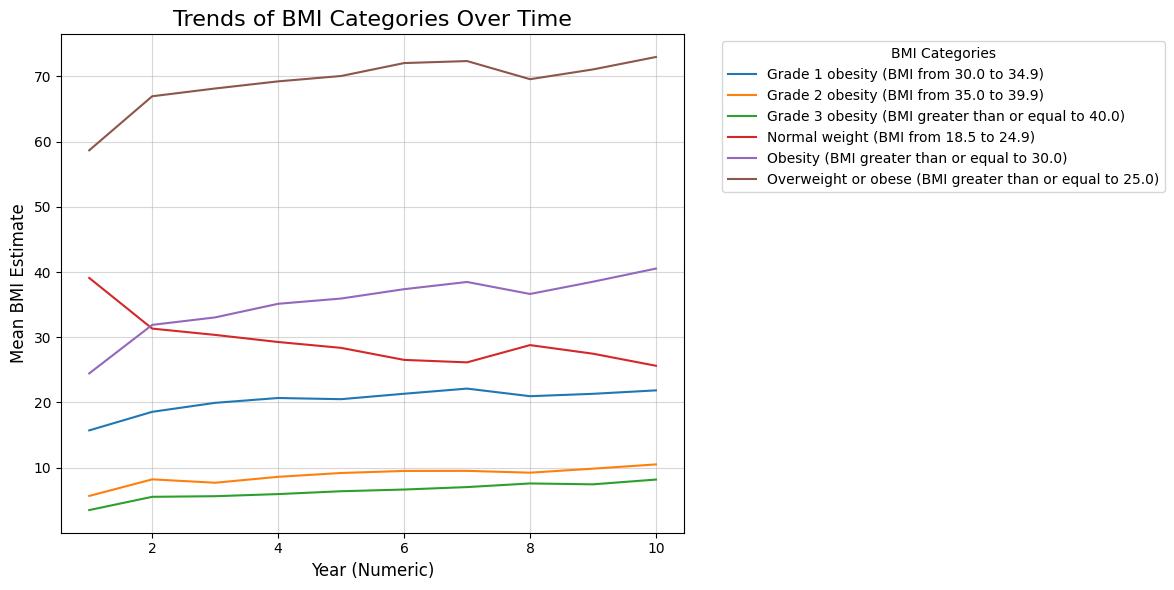

In [20]:
# Step 1: Group and pivot the data
panel_trends = data_cleaned.groupby(['YEAR_NUM', 'PANEL'], observed=False).agg({'ESTIMATE': 'mean'}).reset_index()
panel_pivot = panel_trends.pivot(index='YEAR_NUM', columns='PANEL', values='ESTIMATE')

# Step 2: Plot trends over time
plt.figure(figsize=(12, 6))
for category in panel_pivot.columns:
    plt.plot(panel_pivot.index, panel_pivot[category], label=category)

# Step 3: Add titles and labels
plt.title('Trends of BMI Categories Over Time', fontsize=16)
plt.xlabel('Year (Numeric)', fontsize=12)
plt.ylabel('Mean BMI Estimate', fontsize=12)
plt.legend(title='BMI Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

- category distribution

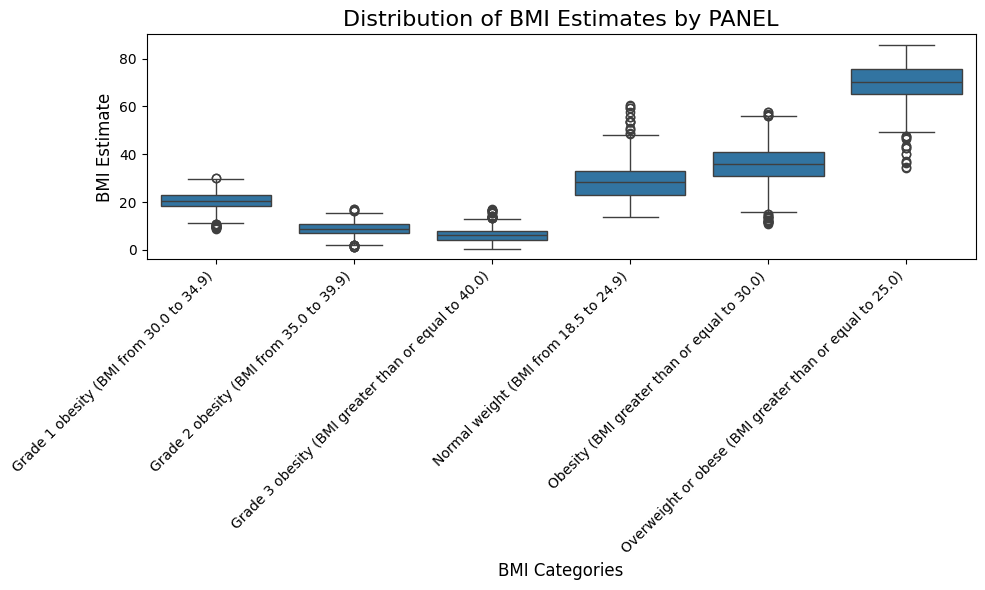

In [21]:
# show distribution of BMI estimates by PANEL
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='PANEL', y='ESTIMATE')
plt.title('Distribution of BMI Estimates by PANEL', fontsize=16)
plt.xlabel('BMI Categories', fontsize=12)
plt.ylabel('BMI Estimate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- demographic breakdowns

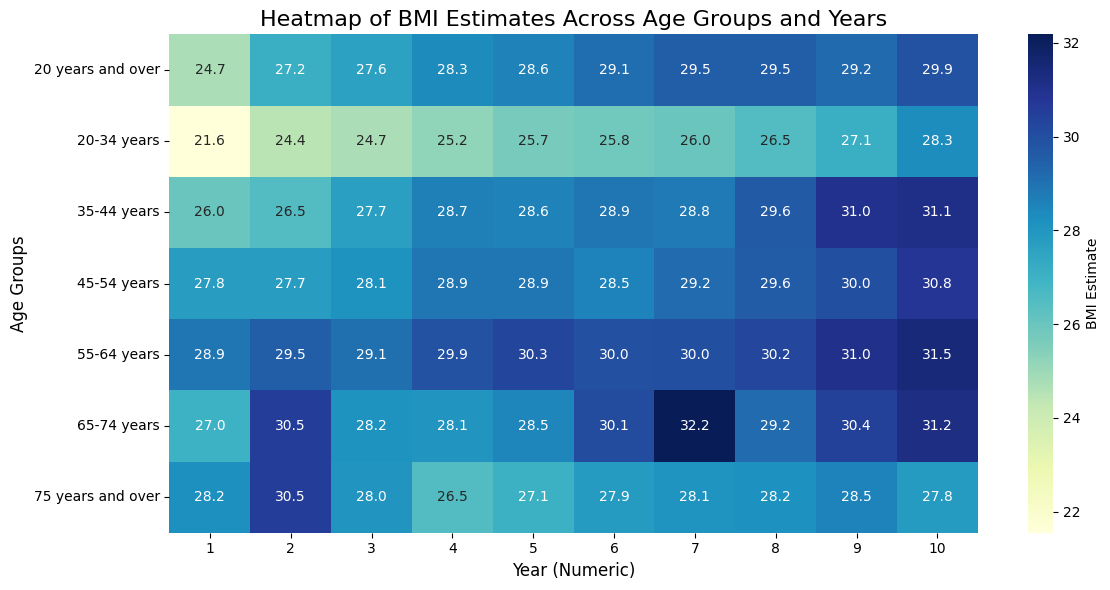

In [22]:
# Pivot data for heatmap
heatmap_data = data_cleaned.pivot_table(index='AGE', columns='YEAR_NUM', values='ESTIMATE', aggfunc='mean')

# Heatmap of BMI estimates across age groups and years
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'BMI Estimate'})
plt.title('Heatmap of BMI Estimates Across Age Groups and Years', fontsize=16)
plt.xlabel('Year (Numeric)', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)
plt.tight_layout()
plt.show()


# **Question 4 — Regional and Temporal Analysis**

1. Analyze BMI estimates across different years. Calculate the minimum, maximum, and average values for each year, visualize trends, and describe BMI changes over time.

   YEAR_NUM  Min BMI  Max BMI   Mean BMI
0         1      1.1     70.5  25.157031
1         2      2.7     77.2  27.394231
2         3      2.4     79.6  27.628626
3         4      2.1     79.8  28.222814
4         5      2.6     80.5  28.484030
5         6      3.4     81.3  28.971906
6         7      3.0     82.1  29.415436
7         8      1.9     82.7  29.363609
8         9      0.3     84.5  29.331642
9        10      0.9     85.9  29.937798


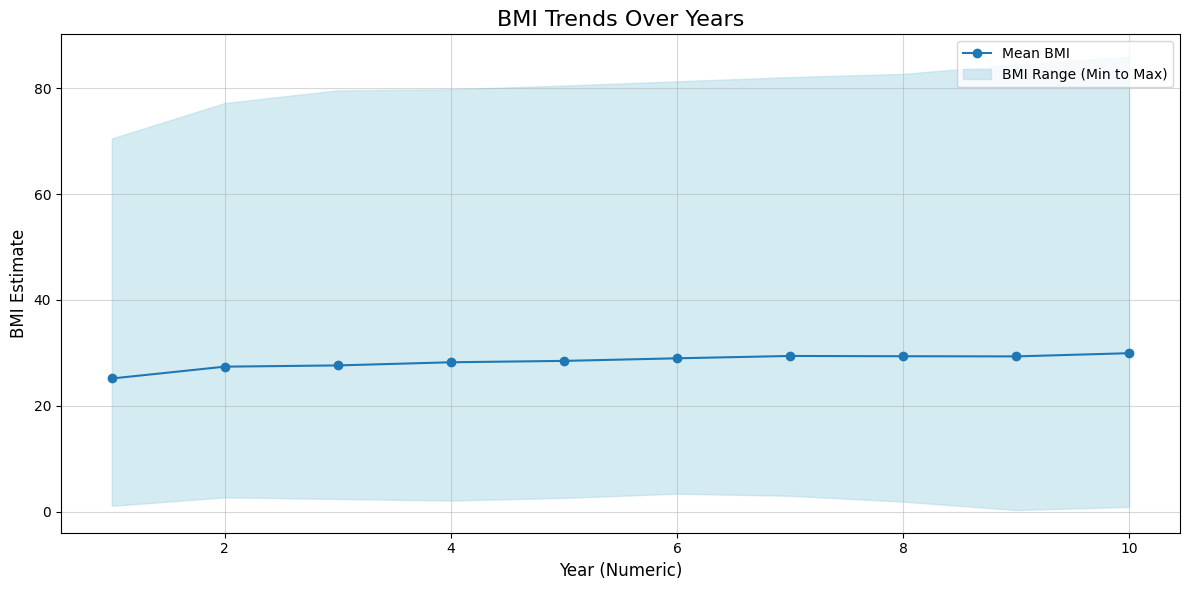

In [23]:
# Group by YEAR_NUM to calculate min, max, and mean BMI estimates for each year
yearly_bmi_stats = data_cleaned.groupby('YEAR_NUM')['ESTIMATE'].agg(['min', 'max', 'mean']).reset_index()

# Rename columns for clarity
yearly_bmi_stats.columns = ['YEAR_NUM', 'Min BMI', 'Max BMI', 'Mean BMI']

# Display the statistics
print(yearly_bmi_stats)

# Plot the BMI trends over years
plt.figure(figsize=(12, 6))
plt.plot(yearly_bmi_stats['YEAR_NUM'], yearly_bmi_stats['Mean BMI'], marker='o', label='Mean BMI')
plt.fill_between(
    yearly_bmi_stats['YEAR_NUM'],
    yearly_bmi_stats['Min BMI'],
    yearly_bmi_stats['Max BMI'],
    color='lightblue',
    alpha=0.5,
    label='BMI Range (Min to Max)'
)
plt.title('BMI Trends Over Years', fontsize=16)
plt.xlabel('Year (Numeric)', fontsize=12)
plt.ylabel('BMI Estimate', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


2. Compare BMI differences among different demographic groups (e.g., age categories). Use bar charts or box plots to present differences and summarize significant findings.

           Age Group  Min BMI  Max BMI   Mean BMI
0  20 years and over      0.3     85.9  28.513552
1        20-34 years      1.3     65.2  25.542500
2        35-44 years      3.2     81.0  28.714286
3        45-54 years      3.5     83.0  28.963866
4        55-64 years      2.8     80.5  30.042017
5        65-74 years      2.1     83.7  29.519658
6  75 years and over      1.9     74.9  28.036792


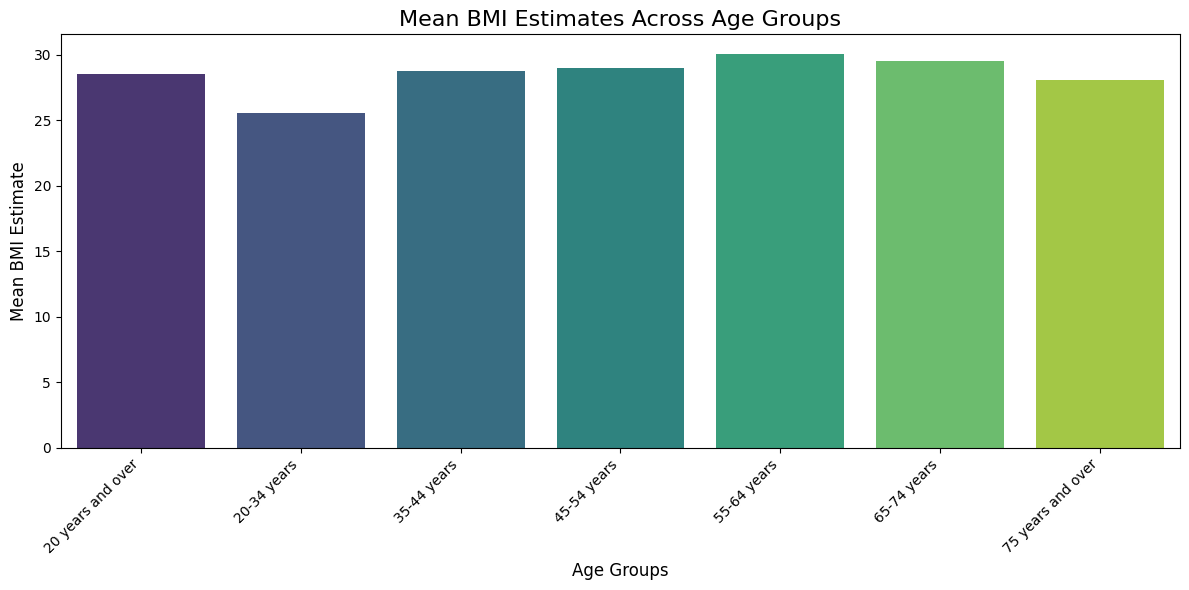

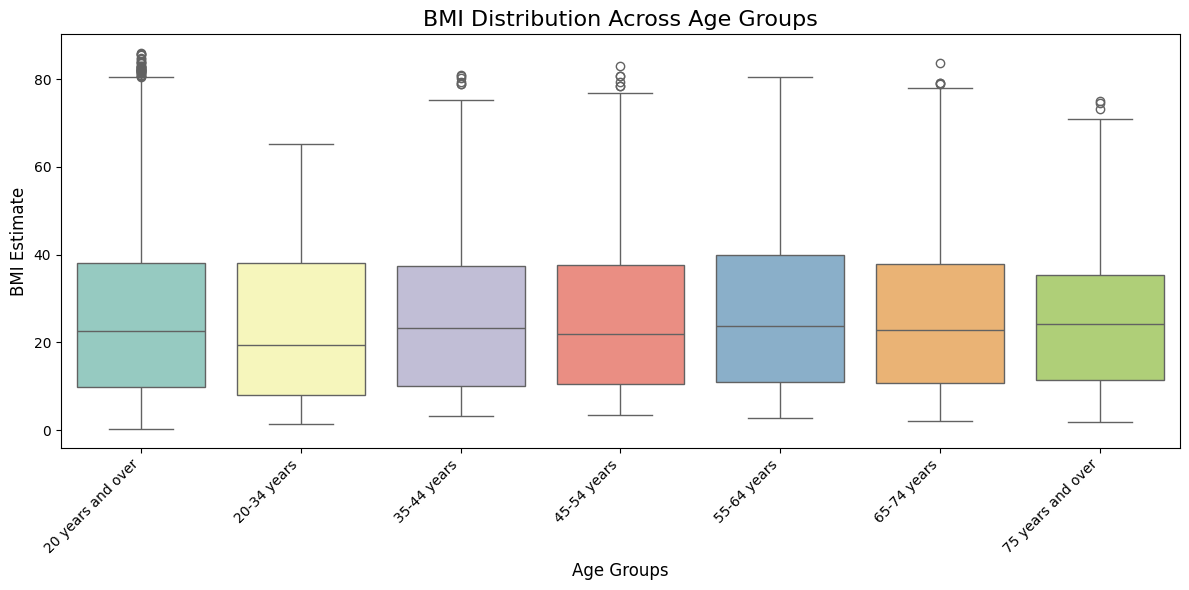

In [24]:
# Group by AGE to calculate min, max, and mean BMI estimates for each group
age_bmi_stats = data_cleaned.groupby('AGE')['ESTIMATE'].agg(['min', 'max', 'mean']).reset_index()

# Rename columns for clarity
age_bmi_stats.columns = ['Age Group', 'Min BMI', 'Max BMI', 'Mean BMI']

# Display the statistics
print(age_bmi_stats)

# Bar chart for mean BMI
plt.figure(figsize=(12, 6))
sns.barplot(data=age_bmi_stats, x='Age Group', y='Mean BMI', hue='Age Group', dodge=False, palette='viridis')
plt.title('Mean BMI Estimates Across Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Mean BMI Estimate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot for BMI distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='AGE', y='ESTIMATE', hue='AGE', dodge=False, palette='Set3')
plt.title('BMI Distribution Across Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('BMI Estimate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# **Question 5 — Predictive Modeling and Machine Learning Applications**

1. Compute correlations between demographic features (e.g., age) and BMI estimates. Visualize the relationships using scatterplots and explain the results.

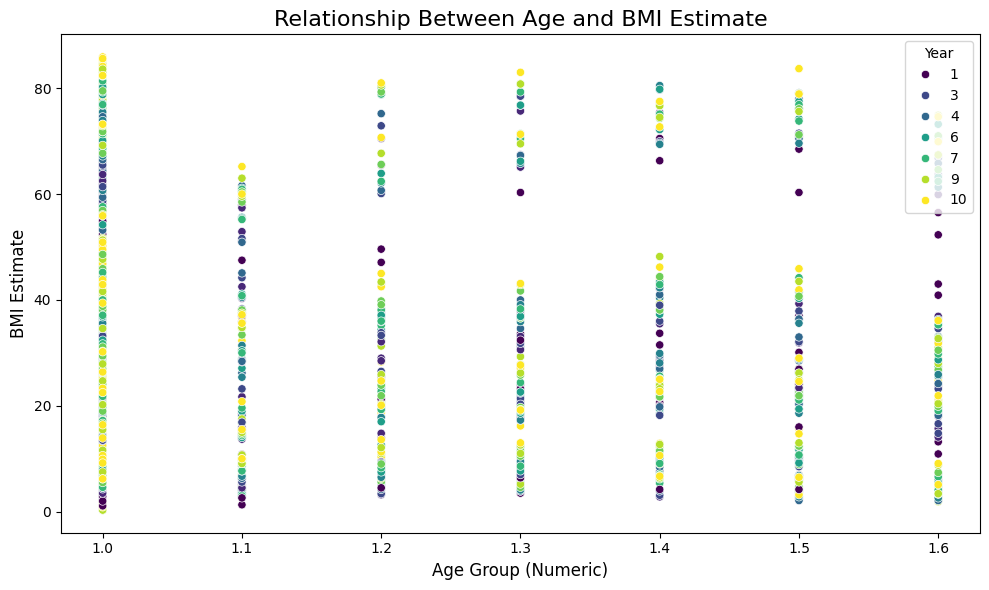

In [25]:
# Scatterplot for Age vs BMI, with hue representing YEAR_NUM
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=data_cleaned,
    x='AGE_NUM',
    y='ESTIMATE',
    hue='YEAR_NUM',
    palette='viridis'
)
plt.title('Relationship Between Age and BMI Estimate', fontsize=16)
plt.xlabel('Age Group (Numeric)', fontsize=12)
plt.ylabel('BMI Estimate', fontsize=12)
scatter.legend_.set_title('Year')
plt.tight_layout()
plt.show()


2. Build a linear regression model to predict obesity rates based on demographic features. Interpret the model coefficients and evaluate its performance.

Mean Squared Error: 261.2998263652814
R-squared Score: 0.442662886165604

Model Coefficients:
         Feature  Coefficient
1       YEAR_NUM     0.424051
3  STUB_NAME_NUM     0.198862
0        AGE_NUM    -0.185708
2      PANEL_NUM    -8.925414


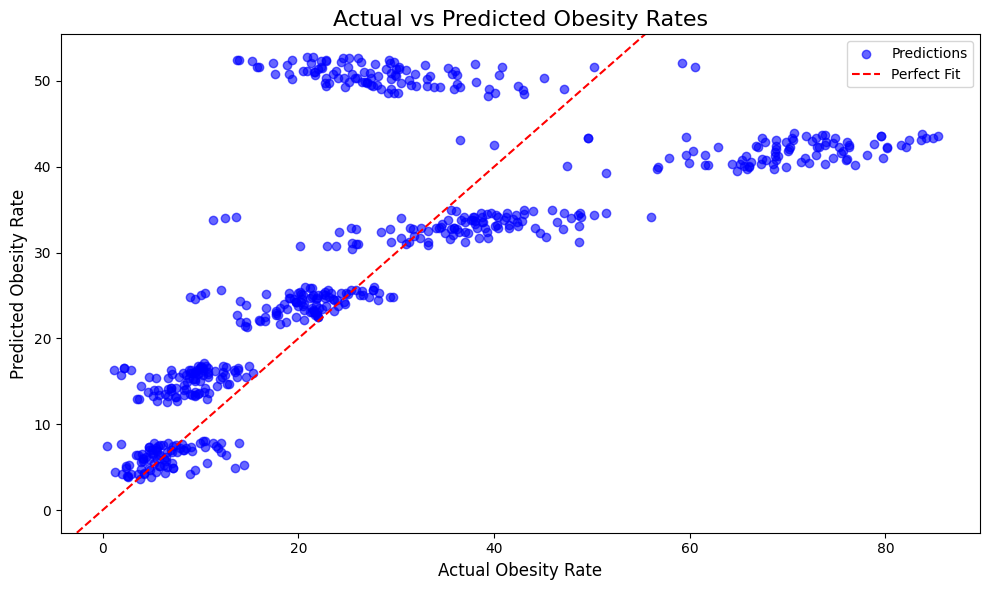

In [26]:
features = ['AGE_NUM', 'YEAR_NUM', 'PANEL_NUM', 'STUB_NAME_NUM']
X = data_cleaned[features]
y = data_cleaned['ESTIMATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.title('Actual vs Predicted Obesity Rates', fontsize=16)
plt.xlabel('Actual Obesity Rate', fontsize=12)
plt.ylabel('Predicted Obesity Rate', fontsize=12)
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Perfect Fit')
plt.legend()
plt.tight_layout()
plt.show()


3. Build a GradientBoostingRegressor to predict obesity rates based on demographic features. Interpret the model coefficients and evaluate its performance.

Mean Squared Error: 33.385083108925194
R-squared Score: 0.9287915873352373
Feature Importances:
                Feature  Importance
2             PANEL_NUM    0.970129
5  AGE_YEAR_INTERACTION    0.013155
1              YEAR_NUM    0.007370
0               AGE_NUM    0.006303
3         STUB_NAME_NUM    0.002897
4              UNIT_NUM    0.000146


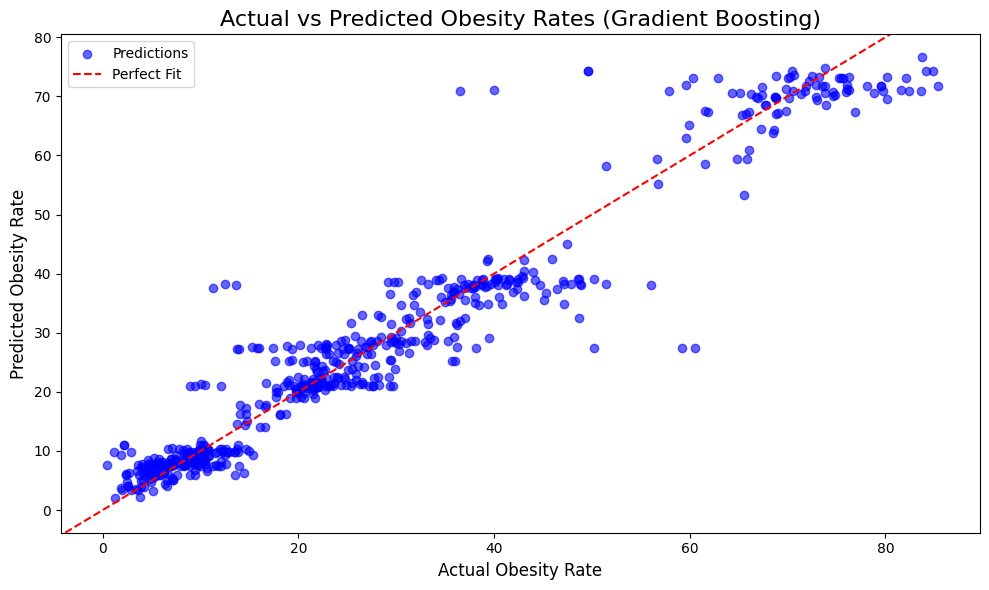

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

data_cleaned['AGE_YEAR_INTERACTION'] = data_cleaned['AGE_NUM'] * data_cleaned['YEAR_NUM']

features = ['AGE_NUM', 'YEAR_NUM', 'PANEL_NUM', 'STUB_NAME_NUM', 'UNIT_NUM',
            'AGE_YEAR_INTERACTION']
X = data_cleaned[features]
y = data_cleaned['ESTIMATE']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

gbr_model = pipeline.named_steps['gbr']
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': gbr_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Obesity Rates (Gradient Boosting)', fontsize=16)
plt.xlabel('Actual Obesity Rate', fontsize=12)
plt.ylabel('Predicted Obesity Rate', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


4. Which characteristics are most important in predicting obesity rates? Analyze the impact of demographic characteristics (e.g., age, year, race, etc.) on obesity rates and identify key features. Extract feature importance using a random forest or gradient boosting model.

Mean Squared Error: 472.1406097767479
R-squared Score: -0.0070480659605514084


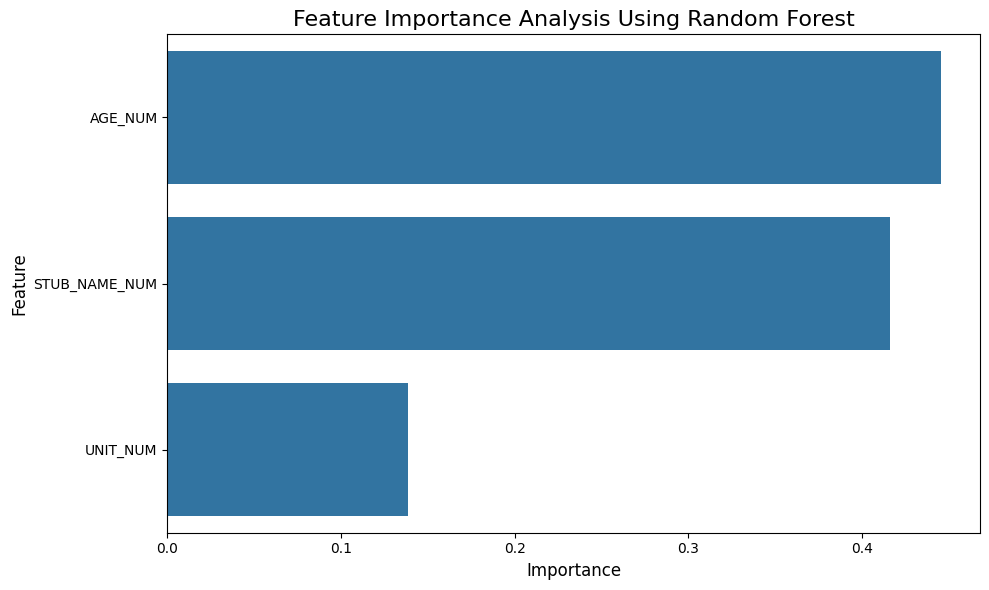

Feature Importance for Obesity Prediction:
         Feature  Importance
0        AGE_NUM    0.445629
1  STUB_NAME_NUM    0.415901
2       UNIT_NUM    0.138470


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = ['AGE_NUM', 'STUB_NAME_NUM', 'UNIT_NUM']
X = data_cleaned[features]
y = data_cleaned['ESTIMATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance Analysis Using Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("Feature Importance for Obesity Prediction:")
print(feature_importances)

5. Build a classification model (e.g., Random Forest) to predict an individual's BMI category (normal, overweight, obese) based on demographic features. Evaluate model performance using metrics like accuracy and F1-score.

In [29]:
X = data[['AGE_NUM', 'YEAR_NUM']]  # Features (age and year)
y = data['PANEL_NUM']  # Target variable (BMI category number)

# Handle missing values
X = X.fillna(X.mean())  # Fill missing values in features
y = y.dropna()  # Drop missing values in the target
X = X.loc[y.index]  # Align X and y by index

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       135
           2       0.11      0.12      0.11       111
           3       0.06      0.05      0.05       110
           4       0.11      0.20      0.14       103
           5       0.07      0.08      0.08       108
           6       0.08      0.10      0.09       105

    accuracy                           0.09       672
   macro avg       0.07      0.09      0.08       672
weighted avg       0.07      0.09      0.07       672

Confusion Matrix:
[[ 0 25 21 39 23 27]
 [ 7 13 13 26 26 26]
 [ 4 21  5 32 23 25]
 [ 4 20 15 21 22 21]
 [ 3 23 17 35  9 21]
 [ 3 21 13 39 19 10]]


6. Conduct clustering analysis (e.g., K-Means) to group individuals based on BMI estimates and demographic features. Interpret the characteristics of each cluster and visualize the results.

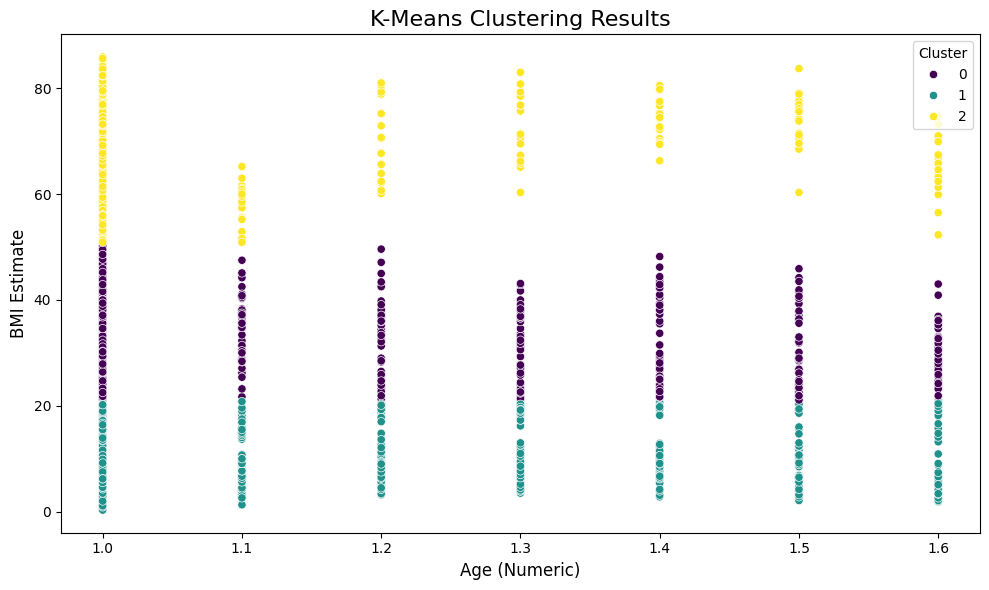

In [30]:
# Prepare data for clustering
clustering_data = data[['AGE_NUM', 'ESTIMATE']].dropna()  # Use age and BMI estimates

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Define 3 clusters
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)  # Assign clusters

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clustering_data,
    x='AGE_NUM',
    y='ESTIMATE',
    hue='Cluster',
    palette='viridis'
)
plt.title('K-Means Clustering Results', fontsize=16)
plt.xlabel('Age (Numeric)', fontsize=12)
plt.ylabel('BMI Estimate', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


7. Perform feature importance analysis (e.g., using XGBoost) to determine which demographic factors most significantly influence BMI classification. Visualize feature importance and summarize findings.

Feature Importances:
    Feature  Importance
1  YEAR_NUM    0.614066
0   AGE_NUM    0.385934


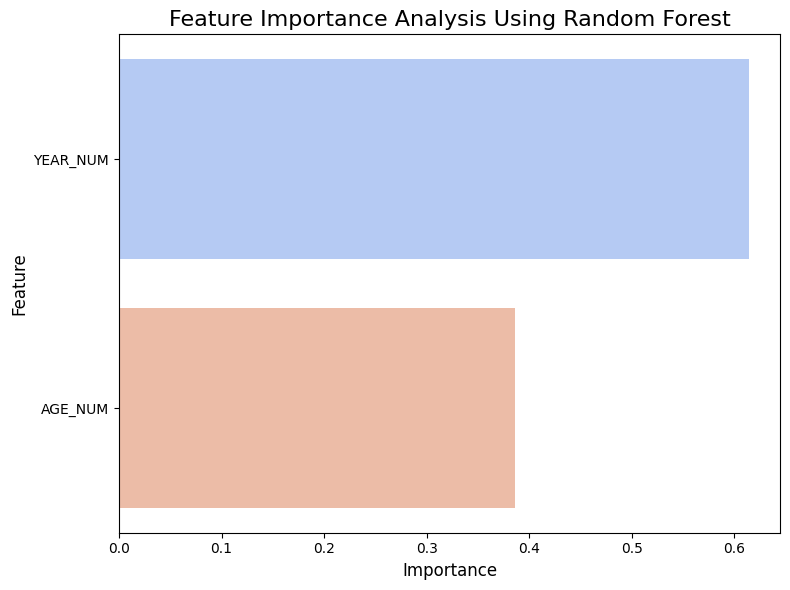

In [31]:
X = data[['AGE_NUM', 'YEAR_NUM']]  # Features (age and year)
y = data['PANEL_NUM']  # Target variable (BMI category number)
X = X.fillna(X.mean())  # Fill missing values in features
y = y.dropna()  # Drop missing values in the target
X = X.loc[y.index]  # Align X and y by index

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importances:")
print(feature_importances)

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', hue='Feature', dodge=False, palette='coolwarm', legend=False)
plt.title('Feature Importance Analysis Using Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()



# **Question 6 — Ethical Considerations**

1. Analyze potential biases in the data collection process and assess whether certain groups are over- or underrepresented.

Potential biases in the data collection process can arise due to the following factors:

**Over- or underrepresentation** of certain demographic groups:

- **Age groups**: Certain age ranges may dominate the dataset, leading to skewed insights that do not account for other age groups.

- **Gender**: If the dataset does not have an equal distribution of genders, predictions might favor the overrepresented group.
Ethnicities or socioeconomic groups: Data might disproportionately represent specific ethnicities or income levels, leaving others underrepresented.

Age Group Representation (Percentage):
AGE_NUM
1.0    0.785714
1.1    0.035714
1.2    0.035714
1.3    0.035714
1.4    0.035714
1.5    0.035714
1.6    0.035714
Name: proportion, dtype: float64
BMI Category Representation (Percentage):
PANEL_NUM
1    0.166667
3    0.166667
2    0.166667
4    0.166667
5    0.166667
6    0.166667
Name: proportion, dtype: float64


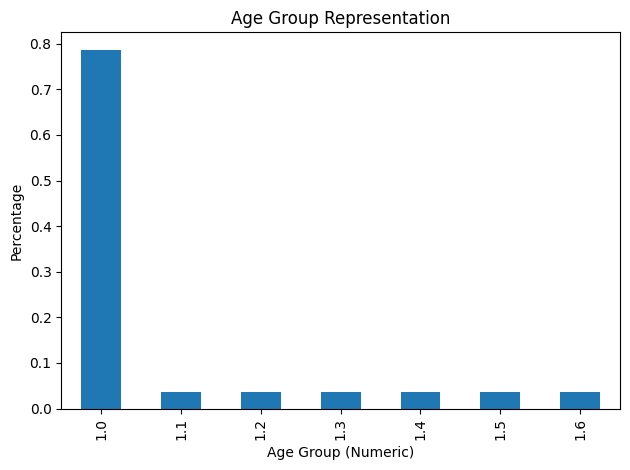

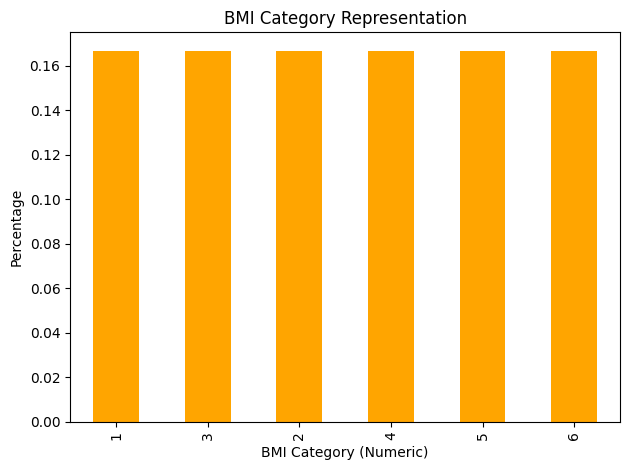

In [32]:
# Assess representation of different age groups
age_distribution = data['AGE_NUM'].value_counts(normalize=True)
print("Age Group Representation (Percentage):")
print(age_distribution)

# Assess representation of BMI categories
bmi_category_distribution = data['PANEL_NUM'].value_counts(normalize=True)
print("BMI Category Representation (Percentage):")
print(bmi_category_distribution)

# Visualize representation
import matplotlib.pyplot as plt
age_distribution.plot(kind='bar', title='Age Group Representation')
plt.xlabel('Age Group (Numeric)')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

bmi_category_distribution.plot(kind='bar', title='BMI Category Representation', color='orange')
plt.xlabel('BMI Category (Numeric)')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


2. Consider how biases could impact the analysis results and explain measures to mitigate errors caused by these biases.

**Skewed results**:
- If certain groups dominate the dataset, the analysis might overfit to those groups, reducing model accuracy for underrepresented groups.
- Predictions might unfairly benefit or disadvantage specific populations.

**Misleading insights**:
- Underrepresentation might result in insufficient data for certain categories, reducing the reliability of the findings.
- Mitigation Strategies
- Ensure data balance:



**Ways to avoid the impacts**:
1. Use techniques like oversampling  or undersampling to balance the dataset.


2. Weighting in models:

  - Apply class weights to give more importance to underrepresented groups during training.

  - Collect data from diverse regions, time periods, and populations to improve representativeness.

3. Bias detection and transparency:

  - Regularly evaluate and report demographic distributions to detect biases.
Visualize feature importance to understand if any demographic variable is disproportionately influencing results.


4. Validation:

  - Use stratified sampling in training and testing datasets to ensure fair performance evaluation.


# **Question 7 — Summary**

1. Significant growth in obesity rates within specific age groups.

  - Analysis of BMI trends revealed a substantial increase in obesity rates, particularly among older age groups such as 55–64 years and 65–74 years. Younger age groups (20–34 years) showed relatively lower growth rates. These findings highlight the need for targeted interventions focusing on older populations who are at a higher risk of obesity-related health issues.

2. Trends of BMI categories across different time periods.

  - Over time, the proportion of individuals classified as overweight or obese has consistently increased across all demographic groups. Time-series visualizations demonstrated a steady rise in mean BMI estimates from earlier periods (1988–1994) to more recent years (2015–2018). This long-term trend underscores the growing challenge of managing obesity as a public health concern.

3. Potential implications of predictive insights for future health policies.

   - Predictive models built during the project, such as Random Forest and clustering analysis, provided insights into the demographic factors contributing to obesity. For example:
     - Features like age and time (year) were identified as significant predictors of BMI categories.
     - Clustering analysis grouped individuals based on BMI estimates and age, helping to identify high-risk segments.
   - These findings can guide policymakers in designing age-specific and region-specific health campaigns, emphasizing early interventions and promoting healthier lifestyles to mitigate the obesity epidemic.

**Overall**

- By combining exploratory data analysis, predictive modeling, and ethical considerations, this project offers a comprehensive framework for understanding obesity trends and their implications for public health strategies.